In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

df = pd.read_csv("./wine.csv", index_col=0)

df

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
Wine,,,,,,,,,,,,,
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835


In [20]:
print(df.columns)

Index(['wine', 'Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols',
       'Flavanoids', 'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue',
       'OD', 'Proline'],
      dtype='object')


### columns 확인

In [54]:
print(df.isnull().sum())  

wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64


### 결측치 확인

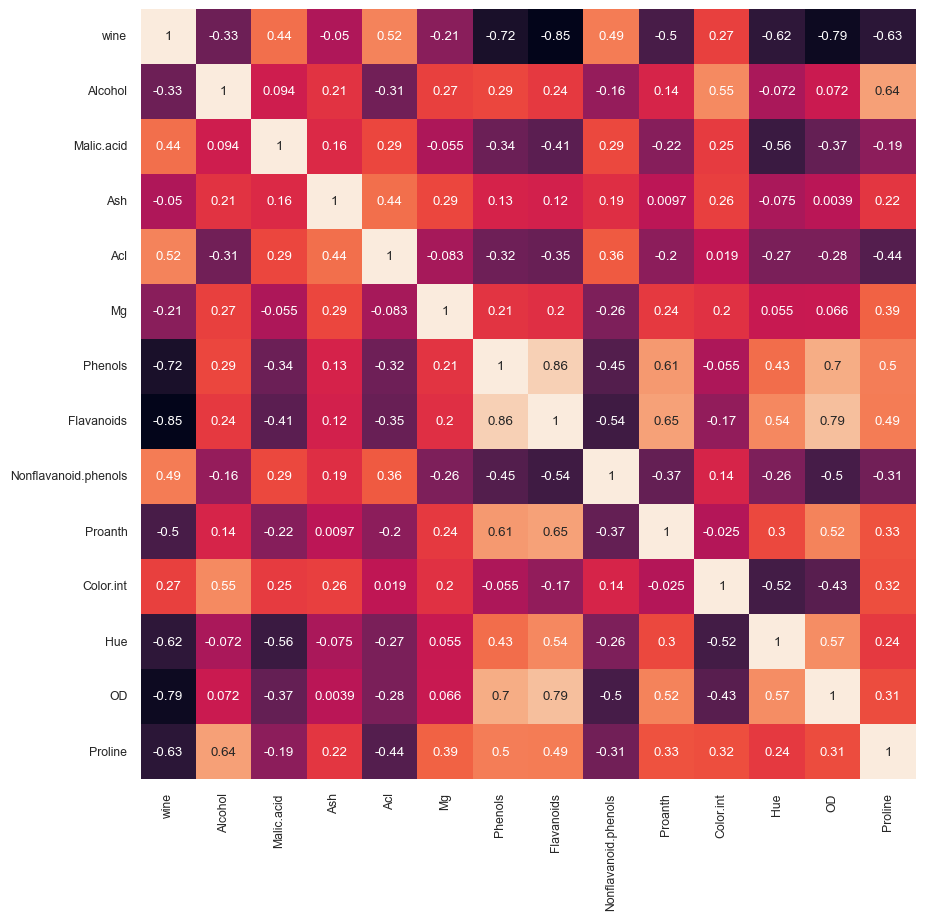

In [55]:
df_corr=df.corr()

plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

히트맵을 통해 wine 등급과 연관있는 값을 확인해보았다. <br>
**Acl, Nonflavanoid.phenols**을 사용할 수 있을 것 같다. <br>
하지만 데이터량이 적은 것 같아 사용해도 유의미한 결과를 내지 못할 것 같다. <br>
모든 데이터를 넣어서 해보고 두 개의 column(Acl, Nonflavanoid.phenols)만 넣어서 대조를 해보겠다.

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [57]:
X = df.drop('wine',axis=1)
X.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
1,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
2,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
3,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
4,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
5,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [58]:
y = df['wine']
y.head()

1    1
2    1
3    1
4    1
5    1
Name: wine, dtype: int32

In [59]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,
                                                  y,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(142, 13) (142,)
(36, 13) (36,)


In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
ly_preds = model.predict(X_test)

print('평균제곱근오차', mean_squared_error(ly_preds, y_test))

평균제곱근오차 0.04746943399428828


In [65]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

dy_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(dy_preds, y_test))

평균제곱근오차 0.3055555555555556


In [66]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

평균제곱근오차 0.05685555555555556


In [67]:
from sklearn.svm import SVR

model = SVR(kernel='linear')
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test) 
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

평균제곱근오차 0.05237000388443376


성능이 생각보다 좋게 나왔다. 이제 Acl, Nonflavanoid.phenols만 사용해서 훈련을 시켜보겠다.

In [74]:
X = df[['Acl', 'Nonflavanoid.phenols']]
X.head()

,Acl,Nonflavanoid.phenols
1,15.6,0.28
2,11.2,0.26
3,18.6,0.30
4,16.8,0.24
5,21.0,0.39


In [75]:
y = df['wine']
y.head()

1    1
2    1
3    1
4    1
5    1
Name: wine, dtype: int32

In [76]:
X_train, X_test, y_train, y_test=train_test_split(X,
                                                  y,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(142, 2) (142,)
(36, 2) (36,)


In [77]:
model = LinearRegression()
model.fit(X_train, y_train)
ly_preds = model.predict(X_test)

print('평균제곱근오차', mean_squared_error(ly_preds, y_test))

평균제곱근오차 0.3182481545250821


In [78]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

dy_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(dy_preds, y_test))

평균제곱근오차 0.6458333333333334


In [79]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

평균제곱근오차 0.3526441720679012


In [80]:
model = SVR(kernel='linear')
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test) 
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

평균제곱근오차 0.30578927071530326


히트맵에서 연관이 어느 정도 있는 값으로 학습을 시켰음에도 불구하고 성능이 더 떨어진 것을 알 수 있다. <br>
데이터의 양의 부족으로 underfitting이 발생한 가능성이 높은 것 같다.